# Projet numérique Câble sous-marin
## Juliette Montantème et Alex Morais Penso

## Questions théoriques

### Question 1

La méthode de Monte Carlo, permet, à l'aide de la loi forte des grands nombres, d'estimer l'espérance conditionnelle par la moyenne empirique de simulations conditionnelles.



### Question 2 

On considère le vecteur $ Z = \begin{pmatrix} Z(x_0)\\Z(x_1)\\...\\Z(x_N) \end{pmatrix}$ correspondant aux points de discrétisation et le vecteur $ Z' = \begin{pmatrix} Z(x_{j_1})\\...\\Z(x_{j_n}) \end{pmatrix}$ correspondant aux  points d'observations. Si certains des indices des composantes observées sont dans ceux de discrétisation, on ote les points correspondants pour obtenir un nouveau vecteur Z. 
On cherche ainsi la loi de la variable aléatoire $Z$ | $Z'=z'$ où $z' = \begin{pmatrix} z(x_{j_1})& z(x_{j_2})&...&z(x_{j_n})\end{pmatrix}$ .

Or, en reprenant les calculs et preuves réalisés dans la section *Vecteur gaussiens à densité* du chapitre **Probabilités IV**, on peut affirmer que cette variable suit une loi gaussienne. 

Introduisons certaines quantités nécessaires pour l'expression de son espérance et de sa variance.

Soient $C_Z$ et $C_{Z'}$ les matrices de covariance de respectivement les vecteurs Z et Z'. 
Soit $C_{ZZ'}$ et $C_{Z'Z}$ (la première étant la transposée de la seconde) les matrices de covariance entre les variables $Z$ et $Z'$.


Soit $CS_z$ la matrice définie par $CS_z = C_Z - C_{ZZ'} C_{Z'}^{-1} C_{Z'Z}$.

On considèrera indifféremment $\mu$ et le vecteur ${\mu} = \begin{pmatrix} \mu & \mu &...&\mu \end{pmatrix}$ qui désigne l'espérance du vecteur $Z$.

Ainsi on introduit la fonction $\psi$ par $\psi(z') = \mu +C_{ZZ'} C_{Z'}^{-1} (z' - \mu)$.

On a donc 
$\mathbb{E} (Z | Z'=z') = \psi(z') $


et


$ \mathbb{V}(Z | Z'=z') = CS_Z$

### Question 3

Soit $Y$ un tel vecteur gaussien. Son espérance est le vecteur nul, et étant donné l'indépendance des composantes et leur variance égale à 1, sa matrice de covariance n'est autre que la matrice identité.

$\mathbb{E}(Y) = \begin{pmatrix} 0 & 0 &...& 0 \end{pmatrix}$ 
et $ \mathbb{V}(Y) = Id_p$

Soit $ Z = m + RY$.

La variable $Z$ est une gaussienne donc les paramètres sont calculés ci-après. 

$\mathbb{E}(Z) = m$ par linéarité de l'espérance.

$\begin{align*} \mathbb{V}(Z) & = \mathbb{E}( (Z - \mathbb{E}(Z)) (Z- \mathbb{E}(Z))^t )\\
                              & = \mathbb{E}( RY R^t Y^t)\\
                              & = R \mathbb{E}(Y Y^t) R^t\\
                              & = R \mathbb{V}(Y) R^t\\
                              & = R R^t\\
                              \end{align*}$
                       

### Question 4

On cherche à simuler un vecteur gaussien dont le vecteur espérance serait ${\mu} = \begin{pmatrix} \mu & \mu &...&\mu \end{pmatrix}$  et la covariance une matrice $C$, définie positive. Or, on peut montrer que $C$ peut se factoriser et s'écrire de la forme $C = R R^t$. 

Pour simuler ce vecteur gaussien on pourrait donc appliquer le résultat obtenu à la question précédente en choisissant $m = \mu$ et $R$ selon la décomposition. En partant de simulation de variables gaussiennes centrées réduites indépendantes, on simule un vecteur gaussien puis on lui fait subir une transformation affine pour qu'il devienne un vecteur gaussien aux caractéristiques souhaitées. 

## Implémentation

Commençons par introduire les données du problème.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy.linalg as alg

In [2]:
#Chargement de dépendances
import numpy as np
import matplotlib.pyplot as plt
import math
import numpy.linalg as alg
import numpy.random as random
from scipy.linalg import cholesky

#Discrétisation
A=0
B=500
N=101 #Nombre de points de discrétisation 
Delta = (B-A)/(N-1)
discretization_indexes = np.arange(N) 
discretization = discretization_indexes*Delta 

#Paramètres du modèle
mu=-5
a = 50 
sigma2 = 12

#Données
observation_indexes = [0,20,40,60,80,100] 
depth = np.array([0,-4,-12.8,-1,-6.5,0])
observation = np.array(observation_indexes) * Delta
#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))
unknown = np.array(unknown_indexes)*Delta

### Question 1 

On implémente d'abord une fonction qui calcule la covariance à partir de réels puis on l'applique à une matrice de distances, afin de renvoyer la matrice de covariance.

In [3]:

def calc_covariance(dist, a, sigma2):
    return sigma2 * math.exp(- dist / a)

def covariance(mat_dist, a, sigma2):
    n, p = np.array(mat_dist).shape
    mat_cov = np.zeros((n, p))
    for i in range(n):
        for j in range(p):
            dist = mat_dist[i, j]
            cov = calc_covariance(dist, a, sigma2)
            mat_cov[i, j] = cov
    return mat_cov

### Question 2

On calcule ici la matrice de distance étant donné deux vecteurs x et x2.


In [4]:
def mat_distances(x, x2):
    mat_dist = np.zeros((len(x), len(x2)))
    for (i, x_i) in enumerate(x):
        for (j, x_j) in enumerate(x2):
            mat_dist[i, j] = abs(x_j-x_i)
    return mat_dist

### Question 3

In [5]:
dist = mat_distances(discretization, discretization)
print(covariance(dist, a, sigma2))

[[1.20000000e+01 1.08580490e+01 9.82476904e+00 ... 6.65419193e-04
  6.02096185e-04 5.44799157e-04]
 [1.08580490e+01 1.20000000e+01 1.08580490e+01 ... 7.35401941e-04
  6.65419193e-04 6.02096185e-04]
 [9.82476904e+00 1.08580490e+01 1.20000000e+01 ... 8.12744838e-04
  7.35401941e-04 6.65419193e-04]
 ...
 [6.65419193e-04 7.35401941e-04 8.12744838e-04 ... 1.20000000e+01
  1.08580490e+01 9.82476904e+00]
 [6.02096185e-04 6.65419193e-04 7.35401941e-04 ... 1.08580490e+01
  1.20000000e+01 1.08580490e+01]
 [5.44799157e-04 6.02096185e-04 6.65419193e-04 ... 9.82476904e+00
  1.08580490e+01 1.20000000e+01]]


### Question 4

In [6]:
# Calcul de la matrice de covariance entre les observations 

dist_obs = mat_distances(observation, observation)
C_obs = covariance(dist_obs, a, sigma2)
print(C_obs)

# Calcul de la matrice de covariance (et de la transposée) entre les observations et les inconnues

dist_obs_un = mat_distances(observation, unknown)
C_obs_un = covariance(dist_obs_un, a, sigma2)
print(C_obs_un)

dist_un_obs = mat_distances(unknown, observation)
C_un_obs = covariance(dist_un_obs, a, sigma2)

# Calcul de la matrice de covariance entre les inconnues

dist_un = mat_distances(unknown, unknown)
C_un = covariance(dist_un, a, sigma2)
print(C_un)



[[1.20000000e+01 1.62402340e+00 2.19787667e-01 2.97450261e-02
  4.02555153e-03 5.44799157e-04]
 [1.62402340e+00 1.20000000e+01 1.62402340e+00 2.19787667e-01
  2.97450261e-02 4.02555153e-03]
 [2.19787667e-01 1.62402340e+00 1.20000000e+01 1.62402340e+00
  2.19787667e-01 2.97450261e-02]
 [2.97450261e-02 2.19787667e-01 1.62402340e+00 1.20000000e+01
  1.62402340e+00 2.19787667e-01]
 [4.02555153e-03 2.97450261e-02 2.19787667e-01 1.62402340e+00
  1.20000000e+01 1.62402340e+00]
 [5.44799157e-04 4.02555153e-03 2.97450261e-02 2.19787667e-01
  1.62402340e+00 1.20000000e+01]]
[[1.08580490e+01 9.82476904e+00 8.88981865e+00 8.04384055e+00
  7.27836792e+00 6.58573963e+00 5.95902365e+00 5.39194757e+00
  4.87883592e+00 4.41455329e+00 3.99445300e+00 3.61433054e+00
  3.27038152e+00 2.95916357e+00 2.67756192e+00 2.42275822e+00
  2.19220229e+00 1.98358666e+00 1.79482343e+00 1.46947714e+00
  1.32963790e+00 1.20310612e+00 1.08861544e+00 9.85019983e-01
  8.91282939e-01 8.06466153e-01 7.29720752e-01 6.60278641

### Question 5

On calcule l'espérance conditionnelle des composantes non observées connaissant les observations. Pour cela on utilise les notions introduites dans la partie théorique.

In [7]:
def CSz(C1, C2, C12, C21):
    return C1 - np.dot(np.dot(C12, alg.inv(C2)), C21)

def psi(z2, C12, C2,  esp_z, esp_z2):
    z2 = np.array(z2).reshape(len(z2), 1)
    res = esp_z + np.dot(np.dot(C12, alg.inv(C2)), (np.array(z2) - np.array(esp_z2)))
    return res[:, 0]

esp_un = mu * np.ones((len(unknown), 1))
esp_obs = mu * np.ones((len(observation), 1))
esp = psi(depth, C_un_obs, C_obs, esp_un, esp_obs)

print(esp)


[ -0.46688335  -0.88839774  -1.26876184  -1.61178245  -1.92089264
  -2.19918609  -2.44944805  -2.67418323  -2.87564085  -3.05583718
  -3.21657567  -3.35946505  -3.4859354   -3.59725249  -3.69453041
  -3.77874275  -3.85073233  -3.91121966  -3.96081011  -4.31432093
  -4.62177936  -4.92545243  -5.2283794   -5.53359206  -5.8441451
  -6.16314662  -6.49378931  -6.83938234  -7.20338453  -7.58943893
  -8.00140931  -8.4434188   -8.91989118  -9.43559515  -9.99569205
 -10.60578751 -11.27198758 -12.00095981 -11.91810571 -11.10545015
 -10.35389999  -9.65593346  -9.00456508  -8.39327573  -7.81594742
  -7.26680206  -6.74034362  -6.23130312  -5.73458592  -5.2452207
  -4.75830973  -4.26897984  -3.77233366  -3.26340058  -2.73708703
  -2.18812549  -1.61102176  -1.43702815  -1.83839689  -2.20812324
  -2.54990754  -2.8671705   -3.16308739  -3.44061983  -3.70254547
  -3.95148576  -4.18993216  -4.42027113  -4.64480797  -4.86578994
  -5.08542869  -5.30592243  -5.52947795  -5.75833267  -5.99477703
  -6.2411774

On la représente ensuite avec les données.

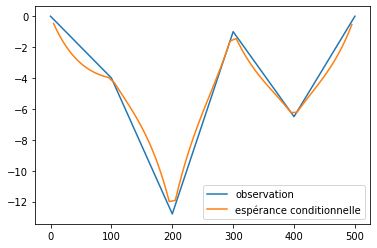

In [8]:
plt.plot(observation, depth, label = "observation")
plt.plot(unknown, esp, label = "espérance conditionnelle")
plt.legend()
plt.show()

### Question 6

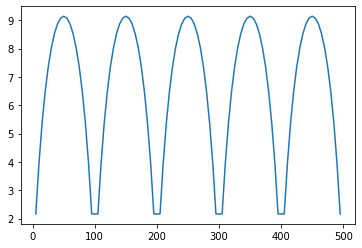

In [9]:
Var = CSz(C_un, C_obs, C_un_obs, C_obs_un)
diag = [Var[i, i] for i in range(len(unknown))]
plt.plot(unknown, diag, label = "Variance")
plt.show()
#PLus on se rapproche des points observés, plus la variance est faible

On constate que plus on est proche des points d'observation, plus la variance est faible. Ce constat semble cohérent, puisqu'il illustre l'intérêt du conditionnement. 

### Question 7

On commence par simuler un vecteur gaussion centré réduit avec la méthode de Box Muller, et ce de la même taille que la discrétisation. Ensuite, on utilise la question 4 de la partie théorique pour nous founir la simulation. Pour cela, on utilise la factorisation de Choelsky (on choisit de ne pas l'implémenter et d'en utiliser une provenant du module scipy). 

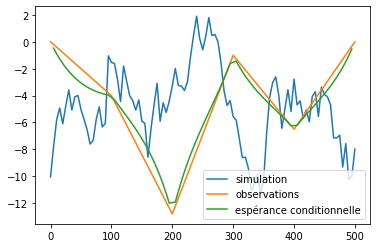

In [10]:
dist_disc = mat_distances(discretization, discretization)
C_disc = covariance(dist_disc, a, sigma2)

def simulation():
    simul = []
    M = mu * np.ones((N,))
    i = 0
    a = False 
    if len(discretization) % 2 == 1:
        a = True 
    while i < len(discretization):
        u = random.rand()
        v = random.rand()
        x = math.sqrt(-2 * math.log(u)) * math.cos(2 * math.pi  * v)
        y = math.sqrt(-2 * math.log(u)) * math.sin(2 * math.pi  * v)
        simul.append(x)
        simul.append(y)
        i += 2
    if a == True:
        simul.pop()
    L = np.transpose(cholesky(C_disc))
    simul = M + np.dot(L, np.transpose(simul))
    return simul

simul = simulation()
plt.plot(discretization, simul, label = "simulation")
plt.plot(observation, depth, label = "observations")
plt.plot(unknown, esp, label = "espérance conditionnelle")
plt.legend()
plt.show()

Une seule simulation n'est peut être pas suffisante pour obtenir un estimateur satisfaisant. On s'approcherait mieux en en effectuant un grand nombre, ce qui permettrait de "noyer" les valeurs incohérentes.

### Question 8

In [11]:
def long_cable(prof, delta):
    L = 0
    for i in range(1, len(prof)):
        L += math.sqrt(delta**2 + (prof[i] - prof[i-1])**2)
    return L


### Question 9

On implémente la fonction, qui à partir de K simulations fournit l'estimateur, c'est-à-dire la moyenne des longueurs obtenues pour chaque simulation.

In [12]:
def long_est(K):
    i = 0
    simulations = []
    longueurs = []
    L = 0
    while i < K:
        simulations.append(simulation())
        longueurs.append(long_cable(simulations[i], Delta))
        L += longueurs[i]
        i += 1
    return L/K

print(long_est(100), long_cable(esp, Delta))

521.4616011902516 471.390923999467


On obtient deux valeurs assez différentes. Il y a peut-être une errreur sur le calcul de l'espérance conditionnelle car la valeur de 521 environ semble plus probable.

### Question 10

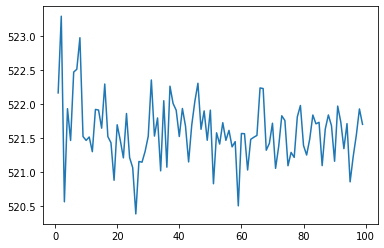

In [16]:
absc = np.arange(1, 100, 1)
long = [long_est(i) for i in absc]
plt.plot(absc, long)
plt.show()

La suite $M_n$ tend, quand le nombre de simulations devient très grand, vers une valeur limite (ce qui est visible quand on augmente le nombre de simulations par la suite) que l'on pourrait interpréter comme l'estimateur limite. Ici, on a représenté $M_n$ jusqu'à 100 simulations.

### Question 11

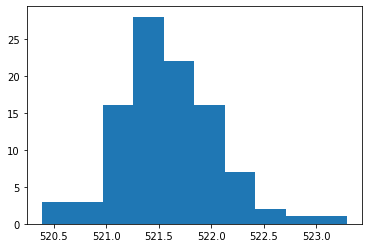

In [17]:
plt.hist(long)
plt.show()

### Question 12

On exploite ici les résultats démontrés dans la partie du cours consacrée à la méthode de Monte-Carlo.

In [18]:
def var_est(K):
    sig2 = 0
    i = 0
    simulations = []
    longueurs = []
    while i < K:
        simulations.append(simulation())
        longueurs.append(long_cable(simulations[i], Delta))
        i += 1
    for j in range(1, K):
        sig2 += (longueurs[j] - long_est(K)) ** 2
    return math.sqrt(sig2/K)
        
print(var_est(100) * 1.96)

5.7672808383184675


### Question 14

In [19]:
print(long_est(1000), long_cable(esp, Delta))

521.486551047771 471.390923999467


In [20]:
print(long_est(10000), long_cable(esp, Delta))

521.5313025802909 471.390923999467


In [21]:
print(long_est(100000), long_cable(esp, Delta))

521.540260810631 471.390923999467


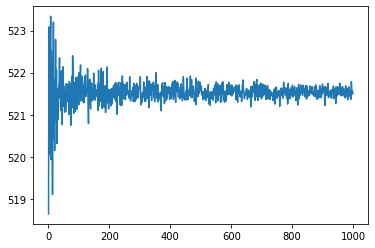

In [22]:
absc = np.arange(1, 1000, 1)
long = [long_est(i) for i in absc]
plt.plot(absc, long)
plt.show()

In [ ]:
absc = np.arange(1, 10000, 1)
long = [long_est(i) for i in absc]
plt.plot(absc, long)
plt.show()